# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [ ]:
headers= ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',names=headers)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.diagnosis.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
data = data.replace('M',1)
data = data.replace('B',0)

# Data Visualisation

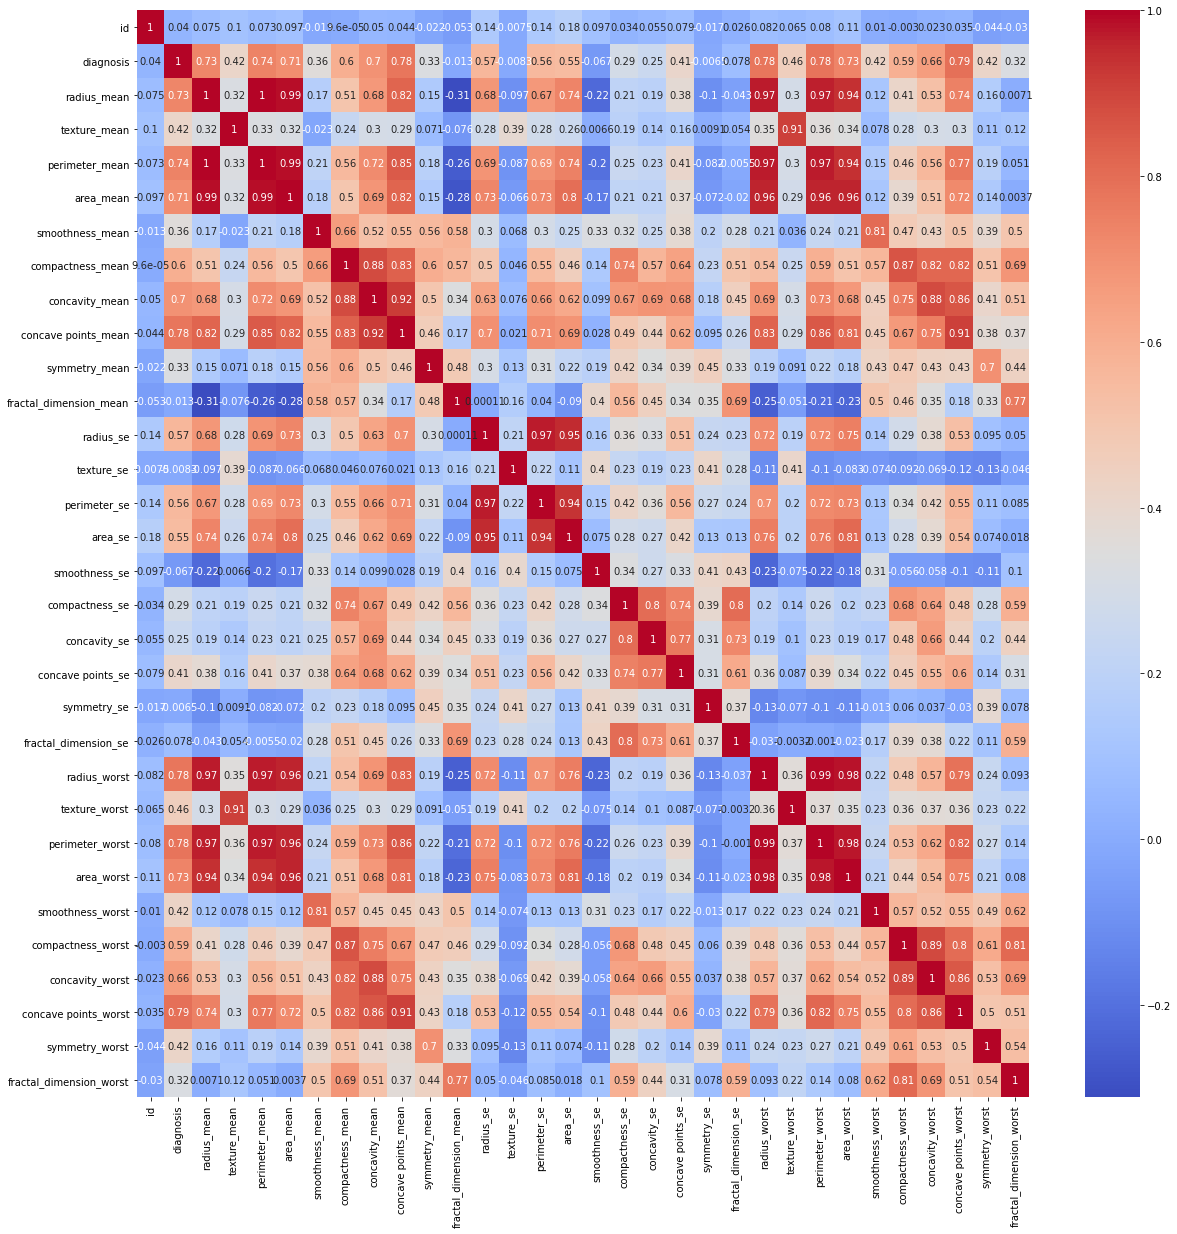

In [ ]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

**Using data visualization tools, please explain how we can understand the data structure.**

In the dataset 3 features was given out of which one was ID of the patients and one column corresponding to the labels whether a patient suffer from benign or malignant tumor. Since only had 31 features, so to find correlation between them, and also with the labels. Thus heat map has been used, it is generally used when there is less features to understand the relation among themselves and with the labels. This visualization technique can be used for feature selection for modeling classification problem.

## Dimensionality reduction.

There are a large number of features (30) in the data. 
Moreover there are quite a few which are not heavily corelated to the target variable, and within the features present they are heavily corelated to each other.

Thus while demensinality reduction using Matrix Factorization and PCA is possible, I would personally rather go with simpler approach of
 feature selection methods. We would do a comparitive study to compare my approach (feature selection) along with dimensionality reduction(PCA). 

In [ ]:
Y = data.diagnosis
X = data.drop(['diagnosis','id'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2,
    stratify=Y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std

array([[-0.86208298, -1.00909399, -0.86134671, ..., -0.69796447,
         0.48121048, -0.60496694],
       [-0.94409271, -0.99994093, -0.95993144, ..., -1.19736488,
        -0.97243401, -0.88676483],
       [-0.67261221, -0.61093615, -0.69567528, ..., -0.66597653,
        -1.92004261, -0.5745023 ],
       ...,
       [-0.46051807,  0.12588466, -0.46209901, ..., -0.56777059,
        -0.35197599, -0.34547352],
       [-1.5529443 , -0.16930132, -1.53957692, ..., -1.70752758,
         0.38451573, -0.15398152],
       [-0.16358627, -0.10294168, -0.14834595, ...,  0.46436345,
        -0.382596  , -0.38790641]])

##Calculating Eigenvalues and eigenvectors

**Importance of eigenvector and eigenvalues** 

PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one. 
While the eigenvalues signify the new magnitude of the data in the new vector spcae. The eigenvectors are the vectors which preserve the maximum variance upon reduction.




In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

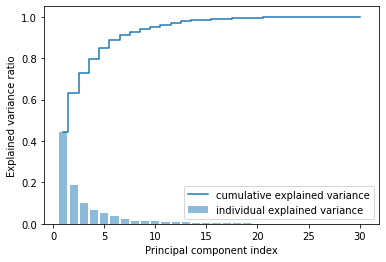

In [ ]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,31), var_exp, alpha=0.5,align='center', label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Only 2 Eigenvectors acount for almost 60% of the variance. Let us plot and see. For Practical machine learning purposes we'll take about 10 features for acounting 90% variance in data.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.21700113 -0.23848702]
 [-0.10103002 -0.05976105]
 [-0.22585165 -0.21945099]
 [-0.21964363 -0.23422535]
 [-0.1561959   0.17727149]
 [-0.24193688  0.14168731]
 [-0.25889011  0.05924065]
 [-0.26143472 -0.04050914]
 [-0.13832939  0.19046021]
 [-0.07436211  0.36643469]
 [-0.2030525  -0.1030786 ]
 [-0.020468    0.0950226 ]
 [-0.20788898 -0.09074368]
 [-0.19972655 -0.15203575]
 [-0.01992919  0.20290395]
 [-0.17317613  0.23613762]
 [-0.15096502  0.20390885]
 [-0.18121901  0.13498372]
 [-0.05084007  0.18212233]
 [-0.10009746  0.28454191]
 [-0.22708814 -0.22270234]
 [-0.10192589 -0.04776171]
 [-0.23540865 -0.20330198]
 [-0.22491863 -0.2204665 ]
 [-0.13315782  0.16501914]
 [-0.21061758  0.13276046]
 [-0.22843828  0.09625091]
 [-0.24885267 -0.01153609]
 [-0.12384352  0.13520559]
 [-0.13266677  0.27039945]]


In [ ]:
X_train_pca = X_train_std.dot(w)

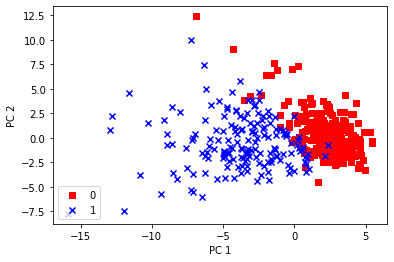

In [ ]:
colors = ['r', 'b']
markers = ['s', 'x']
for l, c, m in zip(np.unique(Y), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

The data can clearly be reduced as seen above as we can clearly seperate the data even with just two Principal Components (60% variance preserved)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

For machine learning model we have accounted the variance to be 95% thus encounting more features for modeling. 

In [ ]:
# intialize pca and logistic regression model accunting 95% variance
pca = PCA(0.95)
# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

We have considered two methods for classification

1.   Logistic Regression
2.   Support Vector Mahince

I have used these methods because these methods are generically used for binary classification. Logistic Regression and Support Vector Machine are simpler methods for training models with less features. Thus, I have chosen these methods.  



In [ ]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted = lr.predict(X_test_pca)

## Confusion Matrix

In [ ]:
matrix = confusion_matrix(y_test, predicted)
matrix

array([[69,  3],
       [ 2, 40]])

Confusion Matrix depicts the performance of the model. It contains 4 values True Positive, True Negative, False Positive, False Negative. This helps in calculation of Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve. The evaluation from the Confusion Matrix depicts large number of values predicted as True postive and True Negative, whereas only few have been depcted as False Positive and False Negative. Thus, in our case it clearly depicts the model to be reliable.

In [ ]:
report = classification_report(y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
accuracy_score(y_test,predicted)

0.956140350877193

In [ ]:
roc_auc_score(y_test,predicted)

0.9553571428571429

In [ ]:
svc = SVC(C=10, gamma=0.01)
svc.fit(X_train_pca, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted = svc.predict(X_test_pca)

In [ ]:
matrix = confusion_matrix(y_test, predicted)
matrix

array([[70,  2],
       [ 3, 39]])

In [ ]:
report = classification_report(y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
accuracy_score(y_test,predicted)

0.956140350877193

In [ ]:
roc_auc_score(y_test,predicted)

0.9503968253968254

# Learning Curve

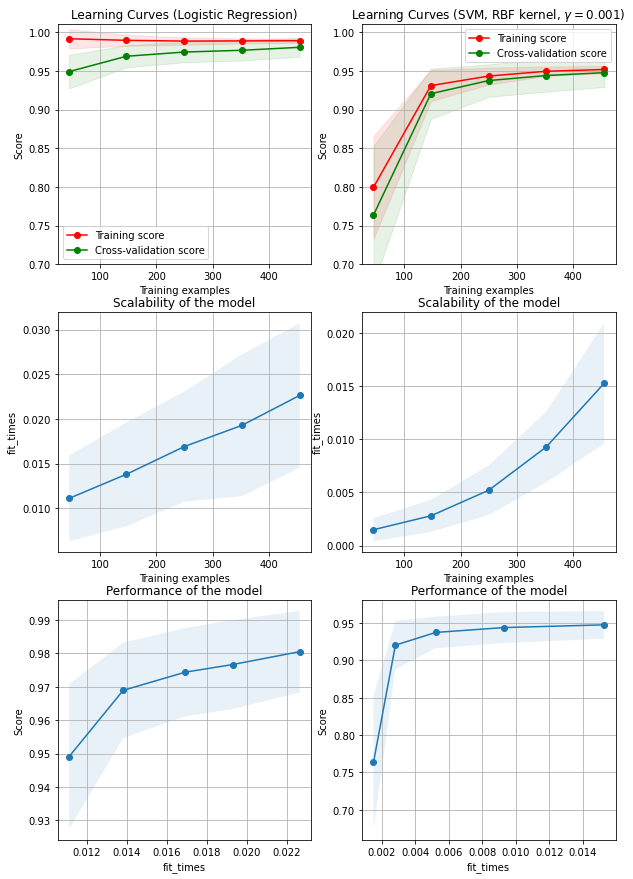

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    sc = StandardScaler()
    X = sc.fit_transform(X)
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (Logistic Regression)"

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

From the learning curve, its clearly evident that the curve for the training score is almost same for the cross validation score. Thus there has been no overfit in the model. Also the predicted accuracy was pretty close to the test accuracy which too stated about the same.Learning curve clearly gives idea about the overfit or underfit of a model on data, and in our case it stated to be reliable as there has been no such overfit or underfit depicted from the plots. 

# Now that we have shown PCA Let's train by Feature Selection

In [ ]:
# removing features that are less correlated with our target variable
data.corr().diagnosis[data.corr().diagnosis<=0.2]

id                        0.039769
fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64

In [ ]:
less_corr = data.corr().diagnosis[data.corr().diagnosis<=0.2].index

In [ ]:
data_drop = data.drop(less_corr,axis=1)

In [ ]:
Y = data_drop['diagnosis']
X = data_drop.drop(['diagnosis'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2,
    stratify=Y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

As SVC performs best lets train SVC with best parameters.
Using Grid Search to find the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_std, Y) 

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# View the parameters
print('Best score for data1:', clf.best_score_) 
print('Best score for data1:', clf.best_params_) 

Best score for data1: 0.9806390977443608
Best score for data1: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
svc = SVC(C=10, gamma=0.01)
svc.fit(X_train_pca, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted = svc.predict(X_test_pca)

In [ ]:
matrix = confusion_matrix(y_test, predicted)
matrix

array([[70,  2],
       [ 3, 39]])

In [ ]:
report = classification_report(y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
accuracy_score(y_test,predicted)

0.956140350877193

In [ ]:
roc_auc_score(y_test,predicted)

0.9503968253968254

We have trained the best model which is also not overfiting as train accuracy is almost equal to test accuracy and we have a very proper bias Variance Trade off.

**When do you consider adding the “regularization parameter” to the model? and how it will help to improve the model performance?**

We consider adding regularization parameter when the model overfits on the train data. This results in poor accuracy in test data whereas high accuracy in train data. From the results calculated the notebook, the confusion matrix for the predicted labels clearly states that the model has not overfit. This is also true because both the train and test accuracy has been almost same, without no such significant difference depicting a good fit. **To avoid overfit we have used cross validation technique to find out the best parameters for the model.** There are two types of regularization.


1.   L1
2.   L2

The idea behind Regularization states about keeping all the features but reducing the magnitude of hypothesis of parameters. It penalize all the parameters giving rise to a simpler hypothesis that is less prone to overfitting.





**Please describe when to use logistic sigmoid, tanh, and Fourier as a basis function.**

Tanh function is mostly used for classification between binary classes. Both tanh and logistic sigmoid activation functions are used in feed-forward nets.  Logistic sigmoid function exists between (0 to 1) hence, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.But in case of tanh the advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.